In [24]:
from detector import *
from cnn_block import *
from preprocess import *
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [25]:
detector = FaceDetector()
preprocessor = Preprocessor()

In [26]:
cnn_block = CnnBlock()

In [27]:
cnn_block.load()

In [28]:
def encode_person(list):
    d = []
    for img in list:
        d.append(cnn_block.encode_image(img))
    return d

In [29]:
#return vectors in one folder
def get_database(img_db):
    dic = {}
    for name, pics in img_db.items():
        dic[name] = encode_person(pics)
    return dic

In [30]:
img_db = preprocessor.get_database()
database = get_database(img_db)

In [31]:
#print(database.items())

In [32]:
def dist_func(a, b):
    return np.linalg.norm(a - b)

In [33]:
def dist_person(img_path, identity):
    vecs = database[identity]
    enc = cnn_block.encode_image( preprocessor.process(img_path)[0])
    dist = 0
    mi = 1
    for ve in vecs:
        dist += dist_func(enc, ve)
        mi = min(mi, dist_func(enc,ve))
    dist /= len(vecs)
    return mi, dist

In [95]:
dic = []
for name, lis in database.items():
    for v in lis:
        l= {}
        #l["z"] = name
        #l["vec"] = v[0]
        for i in range(128):
            l[str(i)] = v[0][i]
        l["z"] = name
        dic.append(l)

In [96]:
#print(dic)

In [97]:
df = pd.DataFrame(dic)

In [98]:
#print(df)

In [99]:
embedded = np.zeros((len(df), 128))
ind = 0
for name, lis in database.items():
    print(name, end=" ")
    print(len(lis))
    for v in lis:
        embedded[ind] = v
        ind+=1

Ariel_Sharon 30
Arnold_Schwarzenegger 30
Colin_Powell 30
Donald_Rumsfeld 30
George_W_Bush 30
Gerhard_Schroeder 30
Hugo_Chavez 30
Jacques_Chirac 30
Tony_Blair 30
Vladimir_Putin 30


In [100]:
#print(embedded)

In [101]:
len(embedded[0])

128

In [102]:
df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,z
0,0.085054,0.164082,-0.097471,-0.116123,-0.004625,0.194311,0.025119,-0.008501,-0.032146,-0.025403,...,0.012314,0.034233,-0.066762,0.060210,0.062568,0.074295,0.056612,-0.014949,-0.065273,Ariel_Sharon
1,0.038185,0.190884,-0.050581,-0.174776,-0.032801,0.198163,0.045137,-0.011516,-0.009111,0.015193,...,0.049230,0.091830,-0.157649,0.032172,0.078263,0.081907,0.084227,0.027274,-0.018669,Ariel_Sharon
2,0.120624,0.130818,-0.096057,-0.118550,-0.013832,0.212729,-0.001142,0.002873,-0.091618,-0.096732,...,0.049307,0.001952,-0.069429,0.069492,0.040952,0.075698,0.056621,0.028411,-0.038539,Ariel_Sharon
3,0.146874,0.140863,-0.146136,0.034563,-0.047171,0.207162,0.023666,0.035503,-0.002205,-0.040056,...,0.071540,-0.001134,-0.043391,0.018959,0.113479,0.121751,-0.044569,0.053808,-0.069754,Ariel_Sharon
4,0.151530,0.160378,-0.122051,-0.041243,-0.007513,0.259648,0.078494,0.040295,-0.063740,-0.004718,...,0.092209,0.033377,-0.125978,-0.004141,0.134298,0.067004,-0.015739,0.019190,-0.074991,Ariel_Sharon
5,0.172939,0.081610,-0.088763,0.045275,0.012050,0.212804,0.072493,0.014716,-0.042416,-0.096171,...,0.137808,-0.015728,-0.048120,0.001966,0.089070,0.094935,0.057041,0.090787,-0.072923,Ariel_Sharon
6,0.165065,0.051819,-0.026663,-0.064793,0.099666,0.172846,0.184010,0.061969,-0.103821,-0.042787,...,0.061350,-0.062378,-0.021095,0.044280,0.114670,0.089920,0.008493,-0.032550,-0.183616,Ariel_Sharon
7,0.191981,-0.032599,-0.073024,-0.079600,0.106689,0.172249,0.156081,0.072448,-0.114752,-0.031121,...,0.035507,-0.040286,-0.036927,0.101083,0.093813,0.021070,0.000857,-0.055617,-0.132636,Ariel_Sharon
8,0.156864,0.100606,-0.035956,-0.034005,0.103147,0.256460,0.109746,0.008047,-0.064742,-0.017623,...,0.047976,0.058047,-0.078948,0.049476,0.094139,0.127317,0.031097,-0.001714,-0.136191,Ariel_Sharon
9,0.117564,0.027406,0.008918,0.076124,0.088941,0.246683,0.142660,-0.029662,-0.038455,-0.073836,...,0.115962,0.004390,-0.077510,-0.000093,0.040410,-0.000377,0.136994,-0.022947,-0.151080,Ariel_Sharon


In [103]:
metadata = np.array(df)

In [104]:
'''from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


targets = np.array([m[128] for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

#encoder = preprocessing.LabelEncoder()
#encoder.fit_transform(targets)
#encoder.fit_transform(embedded)'''

"""
# Numerical encoding of identities
y = encoder.transform(targets)
train_idx = np.arange(metadata.shape[0]) % 3 != 0
test_idx = np.arange(metadata.shape[0]) % 3 == 0

# 50 train examples of 10 identities (5 examples each)
X_train = embedded[train_idx]
# 50 test examples of 10 identities (5 examples each)
X_test = embedded[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]"""
'''
X_train, X_test, y_train, y_test = train_test_split(embedded, targets, random_state=70)
svc = LinearSVC()
print(X_train[0])
svc.fit(X_train, y_train)
print('ok')

acc_svc = accuracy_score(y_test, svc.predict(X_test))


#print(f'SVM accuracy: ',acc_svc)'''

"\nX_train, X_test, y_train, y_test = train_test_split(embedded, targets, random_state=70)\nsvc = LinearSVC()\nprint(X_train[0])\nsvc.fit(X_train, y_train)\nprint('ok')\n\nacc_svc = accuracy_score(y_test, svc.predict(X_test))\n\n\n#print(f'SVM accuracy: ',acc_svc)"

In [114]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

targets = np.array([m[127] for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities y = encoder.transform(targets)

train_idx = np.arange(metadata.shape[0]) % 2 != 0
test_idx = np.arange(metadata.shape[0]) % 2 == 0

# 50 train examples of 10 identities (5 examples each) X_train = embedded[train_idx]
# 50 test examples of 10 identities (5 examples each) X_test = embedded[test_idx]

#y_train = y[train_idx]
#y_test = y[test_idx]
X_train, X_test, y_train, y_test = train_test_split(embedded, targets, random_state=70)

'''knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc = LinearSVC()'''
print('ok')
'''knn.fit(X_train, y_train)'''
'''svc.fit(X_train, y_train)'''
svr = SVR()
svr.fit(X_train, y_train)
print(svr.score(X_train, y_train))


'''acc_knn = accuracy_score(y_test, knn.predict(X_test))
acc_svc = accuracy_score(y_test, svc.predict(X_test))

print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')'''

ok
-0.008210663887152858


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


"acc_knn = accuracy_score(y_test, knn.predict(X_test))\nacc_svc = accuracy_score(y_test, svc.predict(X_test))\n\nprint(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')"

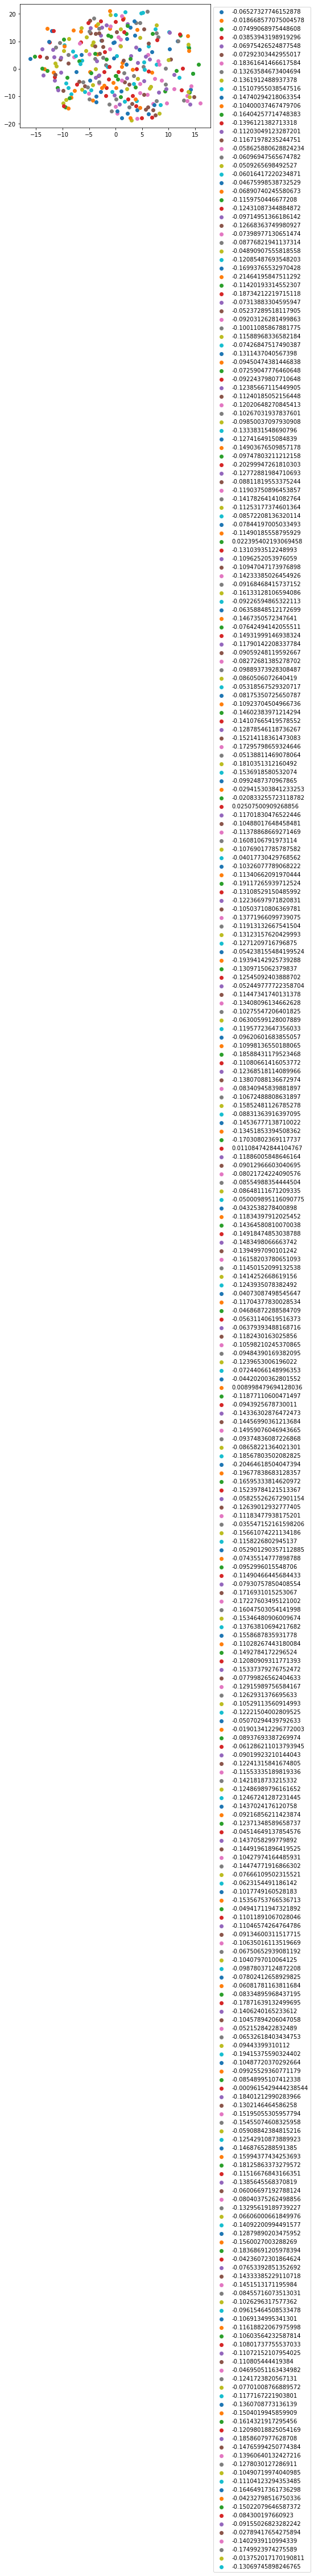

In [115]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(embedded)

for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('plot.png')

In [111]:
def Test_who(path, pri = True):
    #get vec
    ar = preprocessor.process(path)[0]
    emb = cnn_block.encode_image(ar)[0]
    
    #predict
    '''example_prediction = svc.predict([emb])[0]'''
    example_prediction = svr.predict([emb])[0]
    
    
    #plot
    if pri:
        f, axarr = plt.subplots(1,2)
        axarr[0].imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
        axarr[1].imshow(cv2.cvtColor(ar, cv2.COLOR_BGR2RGB))
        plt.savefig('ex.png')
    
    return example_prediction

-0.0916277163279905

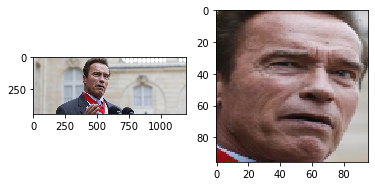

In [112]:
# test_name.jpg
path = "arnold_test.jpg"
Test_who(path)